In [1]:
import sklearn
import pandas as pd

def rename_checkpoint(df: pd.DataFrame, column_name: str):
    df["name"] = df["name"].str.replace("./", "", regex=False)
    df["name"] = df["name"].str.replace("/", "-", regex=False)
    df["name"] = df["name"].str.replace("_", "-", regex=False)


finetune_from_scratch_result = 0.77912

data_finetune = pd.read_csv("data_imdb_new.csv", sep="\t", header=None, names=["name", "finetune_result"])
rename_checkpoint(data_finetune, "name")
data_finetune

,name,finetune_result
0,bert-base-uncased,0.93900
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.93484
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.93164
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.92928
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.92856
...,...,...
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87840
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87900
71,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87840
72,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87824


In [2]:
from functools import partial
import json


def extract(name, data):
    data_dict = json.loads(data.replace("'", "\""))
    return data_dict[name]["acc"] / 100


data_probing = pd.read_csv("probing_res.txt", sep="\t", header=None, names=["name", "probing_result"])
for probing_ds in ["CR", "MR", "MPQA", "SUBJ", "SST2", "SST5"]:
    data_probing[f"{probing_ds}_results"] = data_probing["probing_result"].map(partial(extract, probing_ds))
data_probing.drop("probing_result", axis=1, inplace=True)
rename_checkpoint(data_probing, "name")
data_probing

,name,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results
0,bert-base-uncased,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.8450,0.7896,0.8663,0.9426,0.8342,0.4584
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.8220,0.7720,0.8601,0.9356,0.8072,0.4330
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.8212,0.7619,0.8576,0.9285,0.8127,0.4285
...,...,...,...,...,...,...,...
88,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7478,0.6926,0.8410,0.8989,0.7457,0.3638
89,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7367,0.6926,0.8302,0.9021,0.7386,0.3624
90,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7410,0.6971,0.8310,0.8964,0.7392,0.3715
91,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7428,0.6959,0.8341,0.9019,0.7364,0.3729


In [3]:
import os
import pickle
import numpy as np

features_path = "attention_features"

names = os.listdir(features_path)
features = []
for name in names:
    file_path = f"{features_path}/{name}"
    with open(file_path, "rb") as file:
        model_features = np.load(file)
    features.append(model_features)

features = np.array(features)
features = features.mean(axis=-2)
data_attentions = pd.DataFrame({"name": names, "attention_features": features.tolist()})
rename_checkpoint(data_attentions, "name")
data_attentions

,name,attention_features
0,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-720,"[[[[264.0, 270.5, 270.75, 270.75, 270.75, 270...."
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.0, 270.5, 270.75, 270.75, 270.75, 270...."
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-560,"[[[[265.0, 270.5, 270.75, 270.75, 270.75, 270...."
...,...,...
67,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.5, 270.5, 270.75, 270.75, 270.75, 270...."
68,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.75, 270.75, 270.75, 270.75, 270.75, 27..."
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.25, 270.5, 270.75, 270.75, 270.75, 270..."
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.25, 270.5, 270.75, 270.75, 270.75, 270..."


In [4]:
features[0, 0, 0]

array([[2.648e+02, 2.705e+02, 2.708e+02, 2.708e+02, 2.708e+02, 2.708e+02],
       [1.821e+02, 1.948e+01, 1.332e+00, 1.221e-02, 0.000e+00, 0.000e+00],
       [2.557e+00, 3.215e-01, 2.940e-02, 3.343e-04, 0.000e+00, 0.000e+00],
       [7.725e+01, 1.744e+00, 2.002e-02, 4.883e-04, 0.000e+00, 0.000e+00],
       [1.786e+02, 2.556e+02, 2.712e+02, 2.725e+02, 2.725e+02, 2.725e+02],
       [8.356e+01, 2.486e+00, 4.150e-02, 4.883e-04, 0.000e+00, 0.000e+00]],
      dtype=float16)

In [5]:
df_final = pd.merge(data_finetune, data_probing, on="name")
df_final = pd.merge(df_final, data_attentions, on="name")
df_final

,name,finetune_result,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results,attention_features
0,bert-base-uncased,0.93900,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584,"[[[[267.0, 270.75, 270.75, 270.75, 270.75, 270..."
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.93484,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385,"[[[[263.75, 270.5, 270.75, 270.75, 270.75, 270..."
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.93164,0.8450,0.7896,0.8663,0.9426,0.8342,0.4584,"[[[[264.0, 270.5, 270.75, 270.75, 270.75, 270...."
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.92928,0.8220,0.7720,0.8601,0.9356,0.8072,0.4330,"[[[[265.25, 270.5, 270.75, 270.75, 270.75, 270..."
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.92856,0.8212,0.7619,0.8576,0.9285,0.8127,0.4285,"[[[[265.75, 270.5, 270.75, 270.75, 270.75, 270..."
...,...,...,...,...,...,...,...,...,...
67,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87888,0.7571,0.7063,0.8341,0.9065,0.7474,0.3910,"[[[[266.0, 270.5, 270.75, 270.75, 270.75, 270...."
68,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87884,0.7558,0.7053,0.8336,0.9063,0.7446,0.3796,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87840,0.7597,0.7051,0.8332,0.9039,0.7386,0.3706,"[[[[266.25, 270.75, 270.75, 270.75, 270.75, 27..."
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87900,0.7526,0.7044,0.8328,0.8992,0.7463,0.3805,"[[[[265.25, 270.5, 270.75, 270.75, 270.75, 270..."


In [6]:
from sklearn.model_selection import train_test_split


X = df_final.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df_final["finetune_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
display(X)
display(y)

,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results
0,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584
1,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385
2,0.8450,0.7896,0.8663,0.9426,0.8342,0.4584
3,0.8220,0.7720,0.8601,0.9356,0.8072,0.4330
4,0.8212,0.7619,0.8576,0.9285,0.8127,0.4285
...,...,...,...,...,...,...
67,0.7571,0.7063,0.8341,0.9065,0.7474,0.3910
68,0.7558,0.7053,0.8336,0.9063,0.7446,0.3796
69,0.7597,0.7051,0.8332,0.9039,0.7386,0.3706
70,0.7526,0.7044,0.8328,0.8992,0.7463,0.3805


0     0.93900
1     0.93484
2     0.93164
3     0.92928
4     0.92856
       ...   
67    0.87888
68    0.87884
69    0.87840
70    0.87900
71    0.87840
Name: finetune_result, Length: 72, dtype: float64

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

grid_params = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
}
reg = GridSearchCV(Lasso(), grid_params, cv=5, verbose=False)

res = reg.fit(X_train, y_train)
print(f"Best params: {res.best_params_}")
print(f"Best score: {res.best_score_}")

Best params: {'alpha': 1e-05}
Best score: 0.7936184918141629


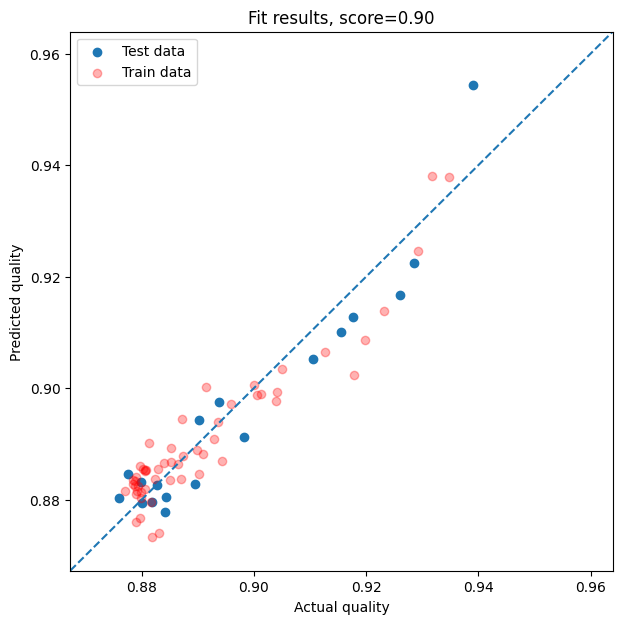

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

def plot_results(y_true, y_pred, y_true_train=None, y_pred_train=None):
    minn = min(min(y_true), min(y_pred)) * 0.99
    maxx = max(max(y_true), max(y_pred)) * 1.01
    score = r2_score(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    plt.scatter(y_true, y_pred, label="Test data")
    if y_true_train is not None:
        plt.scatter(y_true_train, y_pred_train, color="red", alpha=0.3, label="Train data")
    plt.legend()
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlim(minn, maxx)
    plt.ylim(minn, maxx)
    plt.xlabel("Actual quality")
    plt.ylabel("Predicted quality")
    plt.title(f"Fit results, score={score:.2f}")

plot_results(y_test, reg.predict(X_test), y_train, reg.predict(X_train))

In [15]:
from tqdm.notebook import tqdm
import warnings


n_layers = 12
n_heads = 12
n_features = 6
n_thrs = 6
attentions = df_final["attention_features"]
attentions = np.array(attentions.tolist())
assert attentions.shape[1:] == (n_layers, n_heads, n_features, n_thrs)
best_score = -2
scores = {}
best_params = None

for layer in tqdm(range(n_layers)):
    for head in tqdm(range(n_heads)):
        for feature in range(n_features):
            df = df_final.copy()
            for thr in range(n_thrs):
                df[f"topological_val_{thr}"] = attentions[:, layer, head, feature, thr]
            X = df.drop(["name", "finetune_result", "attention_features"], axis=1)
            y = df["finetune_result"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
            
            grid_params = {
                "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
            }
            reg = GridSearchCV(Lasso(), grid_params, cv=5, verbose=False)
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                res = reg.fit(X_train, y_train)
            if res.best_score_ > best_score:
                best_score = res.best_score_
                best_estimator = reg
                best_params = (layer, head, feature)
            scores[layer, head, feature] = res.best_score_

(72, 12, 12, 6, 6)


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

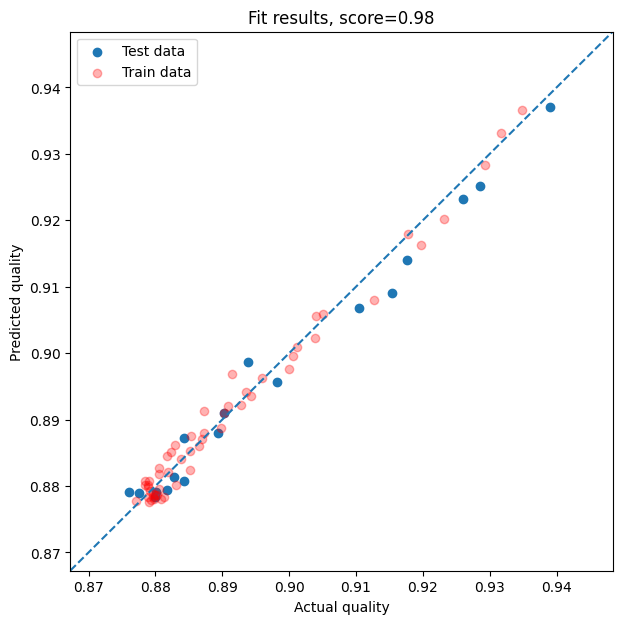

In [16]:
layer, head, feature = best_params

df = df_final.copy()
for thr in range(n_thrs):
    df[f"topological_val_{thr}"] = attentions[:, layer, head, feature, thr]
X = df.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df["finetune_result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)


plot_results(y_test, best_estimator.predict(X_test), y_train, best_estimator.predict(X_train))


In [11]:
import seaborn as sns


arr = np.array([
    [
        [
            scores[layer, head, feature]
            for feature in range(n_features) 
        ]
        for head in range(n_heads)
    ]
    for layer in range(n_layers)
])

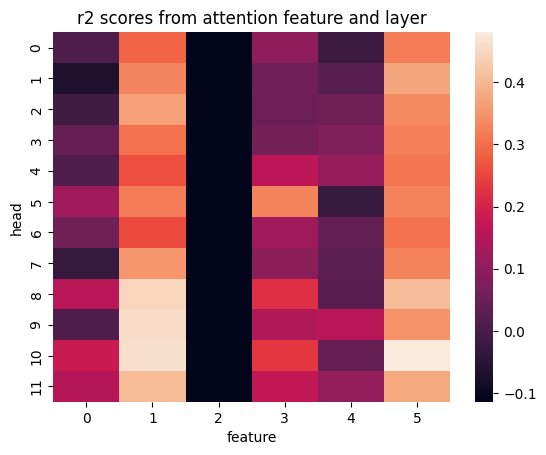

In [12]:
sns.heatmap(arr.mean(axis=0))
plt.title("r2 scores from attention feature and layer")
plt.xlabel("feature")
plt.ylabel("head");

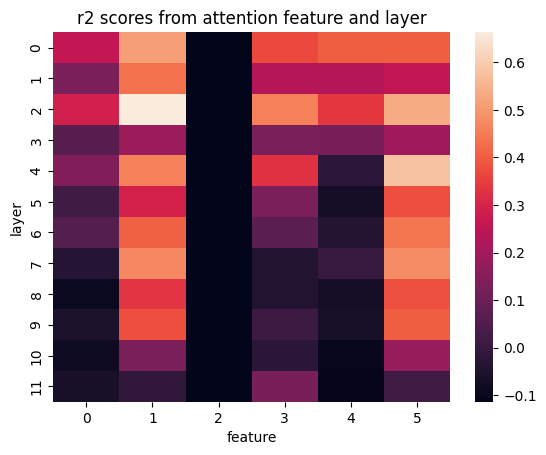

In [13]:
sns.heatmap(arr.mean(axis=1))
plt.title("r2 scores from attention feature and layer")
plt.xlabel("feature")
plt.ylabel("layer");

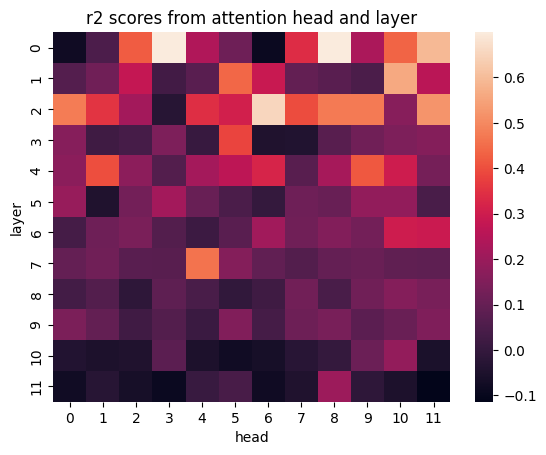

In [14]:
sns.heatmap(arr.mean(axis=2))
plt.title("r2 scores from attention head and layer")
plt.xlabel("head")
plt.ylabel("layer");